In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.output {font-size:10pt;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
</style>
"""))

(24, 24, 4)
<class 'numpy.ndarray'>


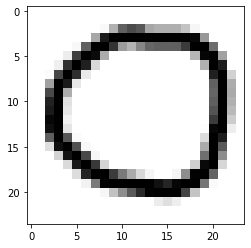

In [2]:
import matplotlib.pyplot as plt

c0 = plt.imread('data/handwriting/handwriting_shape/train/circle/circle001.png')
plt.imshow(c0)
print(c0.shape)
print(type(c0))

In [3]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D # 필터링 => 특성 뽑기 
from tensorflow.keras.layers import MaxPool2D # 풀링 => 용량 최소화 
from tensorflow.keras.layers import Flatten # 2차원 영상 데이터를 1차원으로 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
                                               # (원핫인코딩과 정규화까지 다 해줌)
np.random.seed(3)

In [4]:
# 1. 데이터 생성하기 
train_datagen = ImageDataGenerator(rescale=1./255) # 정규화 작업
train_generator = train_datagen.flow_from_directory(
                    'data/handwriting/handwriting_shape/train',
                    target_size=(24,24), 
                    batch_size=3, # 3개씩 가져와라
                    class_mode='categorical') 
                    # 원핫 인코딩을 3개의 카테고리로 나눠라 (폴더가 3개니까)
                    # 폴더가 2개면 ('binary')
        
test_datagen = ImageDataGenerator(rescale=1./255) # 테스트 데이터 만들기
test_generator = test_datagen.flow_from_directory(
                    'data/handwriting/handwriting_shape/test',
                    target_size=(24,24),
                    batch_size=3,
                    class_mode="categorical")

# 3개의 폴더에 45개 이미지
# 3개의 폴더에 15개 이미지 

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [5]:
# 2. 모델 구성
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3))) 
                    # 32: 필터 수 / 24*24를 3*3으로 속성으로 뽑기 => 22*22 
model.add(Conv2D(64, kernel_size=(3,3), activation='relu')) # 22*22 => 20*20
model.add(MaxPool2D(pool_size=(2,2))) # 2*2 에서 제일 큰 값만 뽑아 이미지 축소 
model.add(Flatten()) # 2차원 이미지데이터를 1차원으로
model.add(Dense(units=128, activation="relu")) # 'unit='는 생략가능 
model.add(Dense(3, activation="softmax"))

In [6]:
# 3. 모델 학습과정 설정 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# 4. 모델 학습하기 
model.fit_generator(train_generator, steps_per_epoch=15,
                    epochs=50,
                    validation_data=test_generator,
                    validation_steps=5) # 5 step마다 한번씩 vallidation 수행해라

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 1s 71ms/step - loss: 1.5191 - accuracy: 0.4515 - val_loss: 0.6278 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 13ms/step - loss: 0.4073 - accuracy: 0.9284 - val_loss: 0.1417 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 0.0810 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 8/50
15

In [8]:
# 5. 모델 평가하기 
score = model.evaluate_generator(test_generator, steps=5)
print("loss: ", score[0])
print("accuracy: ", score[1])

loss:  0.007414620835334063
accuracy:  1.0


C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [9]:
# 6. 예측하기 
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x : "{:0.2f}".format(x)})
print(pred)

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[0.00 1.00 0.00]
 [0.01 0.94 0.05]
 [0.00 0.00 1.00]
 [1.00 0.00 0.00]
 [0.95 0.00 0.05]
 [0.00 1.00 0.00]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [1.00 0.00 0.00]
 [1.00 0.00 0.00]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]
 [0.00 0.00 1.00]
 [1.00 0.00 0.00]]


# accuracy 늘리기 
<ul>
    <li>데이터 확보, 데이터 부풀리기(ImageDataGenerator)</li>
    <li>레이어 층</li>
</ul>

In [10]:
# 1. 데이터 생성하기  # ppt p.105
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7, # 0.7라이안 밀림
                                   zoom_range=[0.9,2.2], # 0.9배~2.2배
                                   horizontal_flip=True, # 수평방향으로 뒤집기
                                   vertical_flip=True, # 수직방향으로 뒤집기
                                   fill_mode='nearest') #이미지를 회전,
                                   #이동하거나 축소할 때 공간을 채우는 방식

train_generator = train_datagen.flow_from_directory(
                    'data/handwriting/hand_test/train',
                    target_size=(24,24), 
                    batch_size=3, # 3개씩 가져와라
                    class_mode='categorical') 
        
test_datagen = ImageDataGenerator(rescale=1./255) # 테스트 데이터 만들기
test_generator = test_datagen.flow_from_directory(
                    'data/handwriting/hand_test/test',
                    target_size=(24,24),
                    batch_size=3,
                    class_mode="categorical")

Found 69 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [14]:
# 2. 모델 구성
model = Sequential()
# conv2D(필터갯수, 필터사이즈, activation_fun, 입력사이즈)
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(24,24,3))) 
                    # 24*24를 3*3으로 속성으로 뽑기 => 22*22 
model.add(Conv2D(32, kernel_size=(3,3), activation='relu')) # 22*22 => 20*20
model.add(MaxPool2D(pool_size=(2,2))) # 2*2 에서 제일 큰 값만 뽑아 이미지 축소 

model.add(Dropout(0.1)) # for 과적합 방지
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) # 2*1에서 제일 큰 값만 뽑아 이미지 축소
model.add(Dropout(0.1))

model.add(Flatten()) # 2차원 이미지데이터를 1차원으로 
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [15]:
# 3. 모델 학습과정 설정 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델 학습하기 
model.fit_generator(train_generator, steps_per_epoch=15,
                    epochs=50,
                    validation_data=test_generator,
                    validation_steps=5) # 5 step마다 한번씩 vallidation 수행해라

Epoch 1/50
15/15 [==============================] - 1s 22ms/step - loss: 1.1270 - accuracy: 0.3283 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 1.1010 - accuracy: 0.3060 - val_loss: 1.0998 - val_accuracy: 0.2667
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 1.0913 - accuracy: 0.3296 - val_loss: 1.1048 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 1.1010 - accuracy: 0.4697 - val_loss: 1.0905 - val_accuracy: 0.4667
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 1.0838 - accuracy: 0.3516 - val_loss: 1.0892 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 1.0581 - accuracy: 0.4446 - val_loss: 1.0920 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 1.0424 - accuracy: 0.3557 - val_loss: 1.0678 - val_accuracy: 0.5333
Epoch 8/50
15/15 

In [16]:
# 5. 모델 평가하기 
score = model.evaluate_generator(test_generator, steps=5)
print("loss: ", score[0])
print("accuracy: ", score[1])

# 6. 예측하기 
pred = model.predict_generator(test_generator)
print(test_generator.class_indices)
np.set_printoptions(formatter={'float':lambda x : "{:0.2f}".format(x)})
print(np.argmax(pred, axis=1))
print(pred)

loss:  1.234062671661377
accuracy:  0.800000011920929
{'circle': 0, 'rectangle': 1, 'triangle': 2}
[2 2 0 0 0 2 2 2 0 1 0 1 2 1 2]
[[0.18 0.00 0.82]
 [0.04 0.00 0.96]
 [1.00 0.00 0.00]
 [0.69 0.00 0.31]
 [1.00 0.00 0.00]
 [0.39 0.09 0.52]
 [0.04 0.00 0.96]
 [0.01 0.00 0.99]
 [0.63 0.10 0.28]
 [0.00 1.00 0.00]
 [1.00 0.00 0.00]
 [0.22 0.72 0.05]
 [0.24 0.06 0.69]
 [0.00 1.00 0.00]
 [0.00 0.00 1.00]]
